# Advanced Lane Lines

## Calibration

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

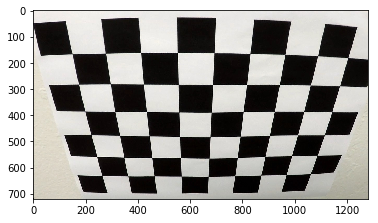

In [22]:
%matplotlib inline
img = mpimg.imread("camera_cal/calibration2.jpg")

plt.imshow(img)

In [20]:
objpoints = [] # 3D points in real world
imgpoints = [] # 2D points in 2D image represenataion of real world

# Generate all grid points
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) 

objp

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  0.],
       [ 5.,  0.,  0.],
       [ 6.,  0.,  0.],
       [ 7.,  0.,  0.],
       [ 8.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 2.,  1.,  0.],
       [ 3.,  1.,  0.],
       [ 4.,  1.,  0.],
       [ 5.,  1.,  0.],
       [ 6.,  1.,  0.],
       [ 7.,  1.,  0.],
       [ 8.,  1.,  0.],
       [ 0.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 2.,  2.,  0.],
       [ 3.,  2.,  0.],
       [ 4.,  2.,  0.],
       [ 5.,  2.,  0.],
       [ 6.,  2.,  0.],
       [ 7.,  2.,  0.],
       [ 8.,  2.,  0.],
       [ 0.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 2.,  3.,  0.],
       [ 3.,  3.,  0.],
       [ 4.,  3.,  0.],
       [ 5.,  3.,  0.],
       [ 6.,  3.,  0.],
       [ 7.,  3.,  0.],
       [ 8.,  3.,  0.],
       [ 0.,  4.,  0.],
       [ 1.,  4.,  0.],
       [ 2.,  4.,  0.],
       [ 3.,  4.,  0.],
       [ 4.,  4.,  0.],
       [ 5.,  4.

In [34]:
%matplotlib inline

# Import all calibration images
cal_images = glob.glob('camera_cal/calibration*.jpg')

# Loop through all calibration images
for cal_fname in cal_images:
    # Read each image
    cal_img = cv2.imread(cal_fname)

    # Convert to grayscale
    gray = cv2.cvtColor(cal_img, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If corners found, add points to arrays
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw the corners
        img_corners = cv2.drawChessboardCorners(cal_img, (9,6), corners, ret)
        
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

## Undistortion

In [ ]:
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

## Perspective transform

In [71]:
src = np.float32([
    [580, 460], # LT
    [703, 460], # RT
    [205, 720], # LB
    [1110, 720], # RB
])

dst = np.float32([
    [320, 0], # LT
    [960, 0], # RT
    [320, 720], # LB
    [960, 720], # RB
])

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

# Get image coordinates as source for perspective change
def change_perspective(img):
    return cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)

## Pipeline on test images

- Undistort
- Change perspective

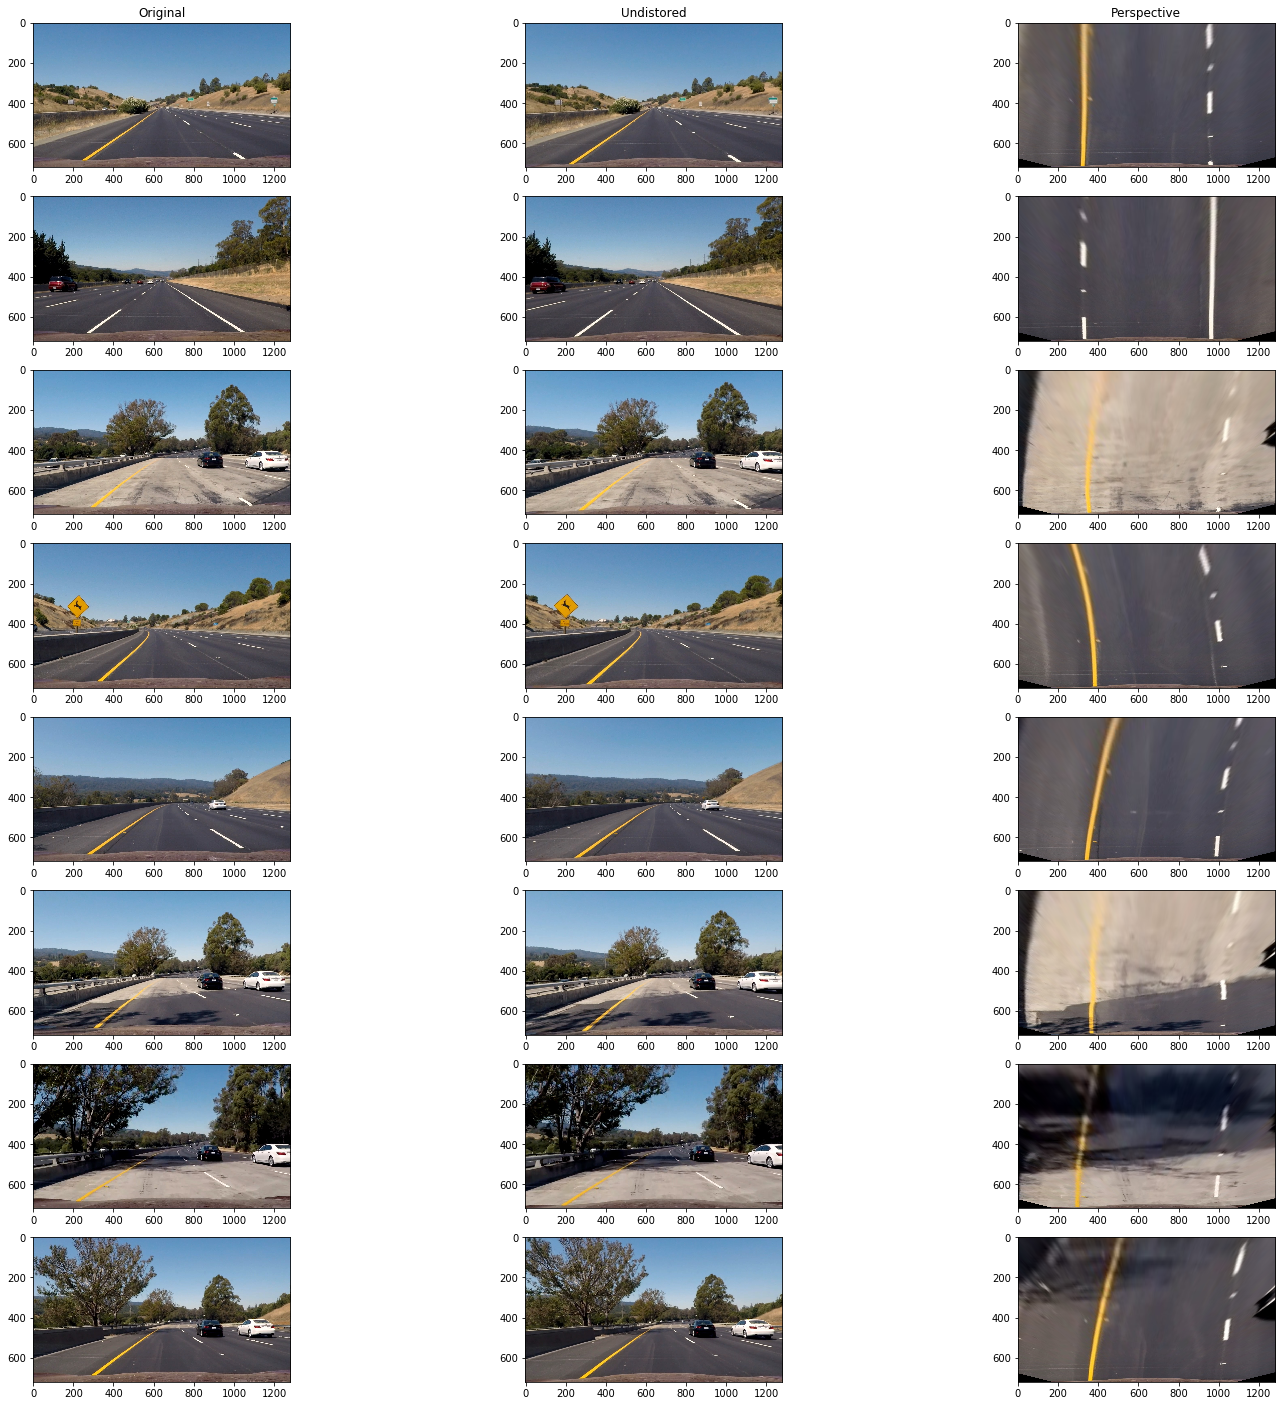

In [73]:
test_images = glob.glob('test_images/*.jpg')

f, axarr = plt.subplots(len(test_images), 3, figsize=(25,25))

for i, test_fname in enumerate(test_images):
    test_image = mpimg.imread(test_fname)
    test_undist_image = undistort(test_image)
    test_perspective_image = change_perspective(test_undist_image)
    
    if i == 0:
        axarr[i,0].set_title('Original')
        axarr[i,1].set_title('Undistored')
        axarr[i,2].set_title('Perspective')
    
    axarr[i,0].imshow(test_image)
    axarr[i,1].imshow(test_undist_image)
    axarr[i,2].imshow(test_perspective_image)